## Comparative Study - Aligner Solution Quality

NOTE: This notebook assumes that all previous notebooks in this directory have already been run to completion.

#### Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#### Reading Results

In [2]:
variants = ["MAli-v1.31", "ClustalW2-MAli-Refine", "ClustalW2", "ClustalOmega", "MUSCLE"]

paths = []
for variant in variants:
    filename = f"sbench_{variant}_on_BALIS-1.csv"
    filepath = f"results/{filename}"
    paths.append(filepath)

In [3]:
for path in paths:
    df = pd.read_csv(path)
    break

df.head()

,aligner,dataset,testcase,Q_score,time_elapsed_ms
0,MAli-v1.31,BALIS-1,BB11004,0.0851,10241
1,MAli-v1.31,BALIS-1,BB11005,0.0512,14767
2,MAli-v1.31,BALIS-1,BB11008,0.2450,13136
3,MAli-v1.31,BALIS-1,BB11009,0.0917,8319
4,MAli-v1.31,BALIS-1,BB11011,0.1150,6031


#### Creating Combined Dataset

In [4]:
data = {
    "Q_score": [],
    "method": [],
    "time_elapsed_ms": [],
}

for i in range(len(variants)):
    label = variants[i]
    path = paths[i]
    df = pd.read_csv(path)

    score_values = list(df["Q_score"].values)
    time_elapsed_values = list(df["time_elapsed_ms"].values)
    method_labels = [label for j in range(len(score_values))]
    data["Q_score"] += score_values
    data["time_elapsed_ms"] += time_elapsed_values
    data["method"] += method_labels
    


In [5]:
df1 = pd.DataFrame(data)
df1.head()

,Q_score,method,time_elapsed_ms
0,0.0851,MAli-v1.31,10241
1,0.0512,MAli-v1.31,14767
2,0.2450,MAli-v1.31,13136
3,0.0917,MAli-v1.31,8319
4,0.1150,MAli-v1.31,6031


#### Creating Seaborn Palette

In [6]:
aligner_mean_serie = df1.groupby('method')['Q_score'].mean()
df1['mean_score'] = df1['method'].map(aligner_mean_serie)
df1 = df1.sort_values(by='mean_score', ascending=False).reset_index(drop=True)

facet_colors = ["tab:red", "tab:orange", "tab:green", "tab:blue", "tab:purple"]
method_names = df1['method'].unique()
palette_dict = dict(zip(method_names, facet_colors))

In [7]:
print(palette_dict)

{'MUSCLE': 'tab:red', 'ClustalOmega': 'tab:orange', 'ClustalW2': 'tab:green', 'ClustalW2-MAli-Refine': 'tab:blue', 'MAli-v1.31': 'tab:purple'}


### Box Plot

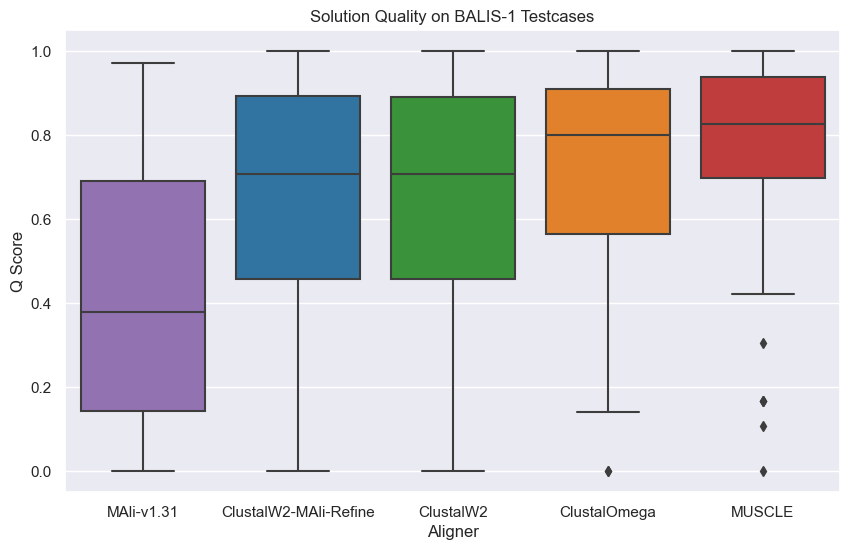

In [8]:

sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6))

df1 = df1.sort_values(by='mean_score', ascending=True).reset_index(drop=True)
sns.boxplot(data=df1, x="method", y="Q_score", palette=palette_dict)

plt.title("Solution Quality on BALIS-1 Testcases")
plt.ylabel("Q Score")
plt.xlabel("Aligner")

plt.savefig("images/CaseStudy_quality_bar_plots_BALIS-1")

plt.show()

### Violin Plot

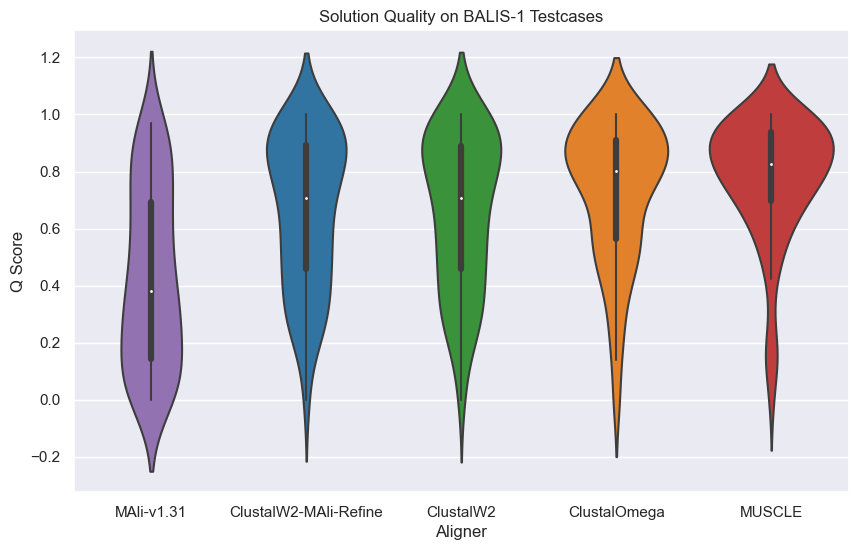

In [9]:

sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6))

df1 = df1.sort_values(by='mean_score', ascending=True).reset_index(drop=True)
sns.violinplot(data=df1, x="method", y="Q_score", palette=palette_dict)

plt.title("Solution Quality on BALIS-1 Testcases")
plt.ylabel("Q Score")
plt.xlabel("Aligner")

plt.savefig("images/CaseStudy_quality_violin_plots_BALIS-1")

plt.show()